In [144]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
#https://www.kaggle.com/datasets/chethuhn/water-bottle-dataset/data

In [145]:
half = tf.keras.preprocessing.image_dataset_from_directory(directory='/content/Half1/')

Found 139 files belonging to 2 classes.


In [146]:

half_images = []
for i,l in half:
    for batches in i:
        img = cv2.resize(batches.numpy().astype('uint8'),(150,150))
        half_images.append(img)
half_images = np.array(half_images)

upside_down_images = []
for image in half_images:
    image = tf.image.random_flip_up_down(image)
    upside_down_images.append(image)
upside_down_images = np.array(upside_down_images)
half_images = np.concatenate((half_images,upside_down_images),axis=0)

In [147]:
half_images.shape

(278, 150, 150, 3)

In [148]:
overflowing = tf.keras.preprocessing.image_dataset_from_directory(directory='/content/Overflowing1/')

Found 39 files belonging to 2 classes.


In [149]:
overflowing_images = []
for i,l in overflowing:
    for batches in i:
      img = cv2.resize(batches.numpy().astype('uint8'),(150,150))
      overflowing_images.append(img)
overflowing_images = np.array(overflowing_images)

upside_down_images = []
for image in overflowing_images:
    image = tf.image.random_flip_up_down(image)
    upside_down_images.append(image)
upside_down_images = np.array(upside_down_images)

right_left_images = []
for image in overflowing_images:
    image = tf.image.random_flip_left_right(image)
    right_left_images.append(image)
right_left_images = np.array(right_left_images)

hue_images = []
for image in overflowing_images:
    image = tf.image.random_hue(image, max_delta=0.25)
    hue_images.append(image)
hue_images = np.array(hue_images)

upside_down_hue_images = []
for image in hue_images:
    image = tf.image.random_flip_up_down(image)
    upside_down_hue_images.append(image)
upside_down_hue_images = np.array(upside_down_hue_images)
overflowing_images = np.concatenate((overflowing_images,upside_down_images,right_left_images,upside_down_hue_images,hue_images),axis=0)

In [150]:
full = tf.keras.preprocessing.image_dataset_from_directory(directory='/content/Full1/')

Found 308 files belonging to 2 classes.


In [151]:
full_images = []
for i,l in full:
    for batches in i:
      img = cv2.resize(batches.numpy().astype('uint8'),(150,150))
      full_images.append(img)
full_images = np.array(full_images)

In [152]:
images = np.concatenate((half_images,full_images,overflowing_images),axis=0)
labels = np.concatenate((np.ones(278,dtype='int')*0,np.ones(308,dtype='int'),np.ones(195,dtype='int')*2),axis=0)

In [153]:
images.shape

(781, 150, 150, 3)

In [154]:
labels.shape

(781,)

In [155]:
perm = np.random.permutation(len(images))
x = images[perm]
y = labels[perm]

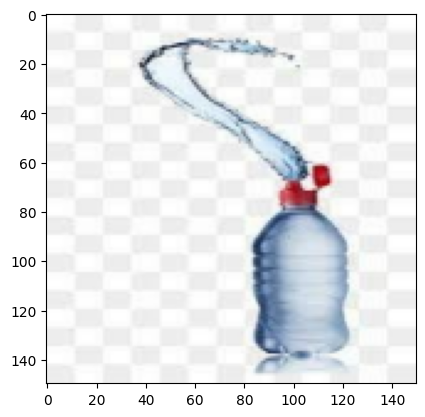

In [156]:
plt.imshow(images[600])

In [157]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [159]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(150,150,3)))
model.add(tf.keras.layers.Conv2D(filters=200,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=100,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(filters=20,kernel_size=(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=100,activation='relu'))
model.add(tf.keras.layers.Dense(units=50,activation='relu'))
model.add(tf.keras.layers.Dense(units=3,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train/255,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
16/16 [==============================] - 10s 323ms/step - loss: 1.0913 - accuracy: 0.3808 - val_loss: 1.1123 - val_accuracy: 0.3200
Epoch 2/30
16/16 [==============================] - 2s 133ms/step - loss: 1.0834 - accuracy: 0.4309 - val_loss: 1.0984 - val_accuracy: 0.3200
Epoch 3/30
16/16 [==============================] - 2s 134ms/step - loss: 1.0576 - accuracy: 0.4228 - val_loss: 1.0977 - val_accuracy: 0.3200
Epoch 4/30
16/16 [==============================] - 2s 129ms/step - loss: 1.0551 - accuracy: 0.4469 - val_loss: 1.0834 - val_accuracy: 0.3920
Epoch 5/30
16/16 [==============================] - 2s 137ms/step - loss: 1.0275 - accuracy: 0.4850 - val_loss: 1.0662 - val_accuracy: 0.4240
Epoch 6/30
16/16 [==============================] - 2s 128ms/step - loss: 1.0053 - accuracy: 0.4930 - val_loss: 1.0374 - val_accuracy: 0.4720
Epoch 7/30
16/16 [==============================] - 2s 128ms/step - loss: 0.9557 - accuracy: 0.5311 - val_loss: 1.0407 - val_accuracy: 0.5200
Epoch

In [160]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 27ms/step - loss: 324.2174 - accuracy: 0.6879


[324.2173767089844, 0.6878980994224548]

In [212]:
model.save('waterbottlequantitypredict.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [205]:
img = cv2.imread('/content/images.jpg')

In [206]:
img =cv2.resize(img,(150,150))

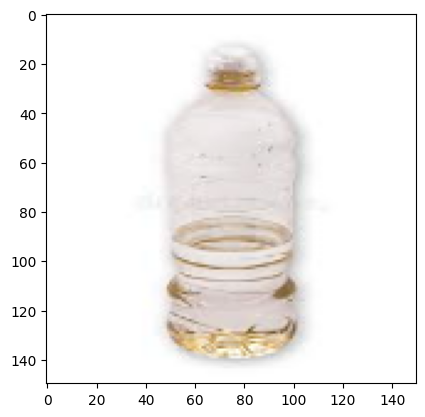

In [207]:
plt.imshow(img)

In [208]:
img = np.expand_dims(img,axis=0)

In [209]:
img.shape

(1, 150, 150, 3)

In [210]:
class_names= ['half','full','overflowing']

In [211]:
class_names[np.argmax(model.predict(img))]

1/1 [==============================] - 0s 19ms/step


'half'